In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
df = pd.read_csv('clothing_reviews_clean_with_features.csv')

In [32]:
df.head(3)

,Unnamed: 0,clothing_id,review,recommended,rating,age,class,department,division_name,length,...,lower,no_punc,no_stop,no_num,words_removed,token,pos_tags,lemmatized,joined,polarity_clean
0,0,767,Absolutely wonderful - silky and sexy and comf...,1,4,33,Intimates,Intimate,Initmates,53,...,absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable,"['absolutely', 'wonderful', 'silky', 'sexy', '...","[('absolutely', 'RB'), ('wonderful', 'JJ'), ('...","['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,0.633333
1,1,1080,Love this dress! it's sooo pretty. i happene...,1,5,34,Dresses,Dresses,General,303,...,love this dress! it's sooo pretty. i happened ...,love this dress its sooo pretty i happened to ...,love dress sooo pretty happened find store im ...,love dress sooo pretty happened find store im ...,love sooo pretty happened find store glad bc n...,"['love', 'sooo', 'pretty', 'happened', 'find',...","[('love', 'VB'), ('sooo', 'NN'), ('pretty', 'R...","['love', 'sooo', 'pretty', 'happen', 'find', '...",love sooo pretty happen find store glad bc nev...,0.318750
2,2,1077,I had such high hopes for this dress and reall...,0,3,60,Dresses,Dresses,General,500,...,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,high hopes dress really wanted work initially ...,high hopes really wanted work initially ordere...,"['high', 'hopes', 'really', 'wanted', 'work', ...","[('high', 'JJ'), ('hopes', 'NNS'), ('really', ...","['high', 'hope', 'really', 'want', 'work', 'in...",high hope really want work initially order pet...,0.045530


In [34]:
# Create dataframe with the features we are interested in

analysis_df = df[['clothing_id', 'lemmatized', 'recommended', 'rating', 'age', 'class', 'department', 'division_name', 'length']]

In [35]:
analysis_df

,clothing_id,lemmatized,recommended,rating,age,class,department,division_name,length
0,767,"['absolutely', 'wonderful', 'silky', 'sexy', '...",1,4,33,Intimates,Intimate,Initmates,53
1,1080,"['love', 'sooo', 'pretty', 'happen', 'find', '...",1,5,34,Dresses,Dresses,General,303
2,1077,"['high', 'hope', 'really', 'want', 'work', 'in...",0,3,60,Dresses,Dresses,General,500
3,1049,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",1,5,50,Pants,Bottoms,General Petite,124
4,847,"['flatter', 'due', 'adjustable', 'front', 'tie...",1,5,47,Blouses,Tops,General,192
...,...,...,...,...,...,...,...,...,...
22636,1104,"['happy', 'snag', 'great', 'price', 'easy', 's...",1,5,34,Dresses,Dresses,General Petite,131
22637,862,"['reminds', 'maternity', 'clothes', 'soft', 's...",1,3,48,Knits,Tops,General Petite,223
22638,1104,"['well', 'see', 'never', 'work', 'glad', 'able...",0,3,31,Dresses,Dresses,General Petite,208
22639,1084,"['buy', 'wed', 'summer', 'cute', 'unfortunatel...",1,3,28,Dresses,Dresses,General,427


In [36]:
# Calculate the polarity of reviews and add a column with the result

analysis_df['polarity'] = analysis_df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [39]:
analysis_df.head(3)

,clothing_id,lemmatized,recommended,rating,age,class,department,division_name,length,polarity
0,767,"['absolutely', 'wonderful', 'silky', 'sexy', '...",1,4,33,Intimates,Intimate,Initmates,53,0.633333
1,1080,"['love', 'sooo', 'pretty', 'happen', 'find', '...",1,5,34,Dresses,Dresses,General,303,0.318750
2,1077,"['high', 'hope', 'really', 'want', 'work', 'in...",0,3,60,Dresses,Dresses,General,500,0.045530


In [44]:
# Create new column where we bin reviews based on polarity

analysis_df['polarity_bins'] = pd.cut(analysis_df['polarity'],
                            bins = 5,
                            labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive'])

In [45]:
analysis_df['polarity_bins'].value_counts()

positive         12112
neutral           9539
very positive      757
negative           225
very negative        8
Name: polarity_bins, dtype: int64

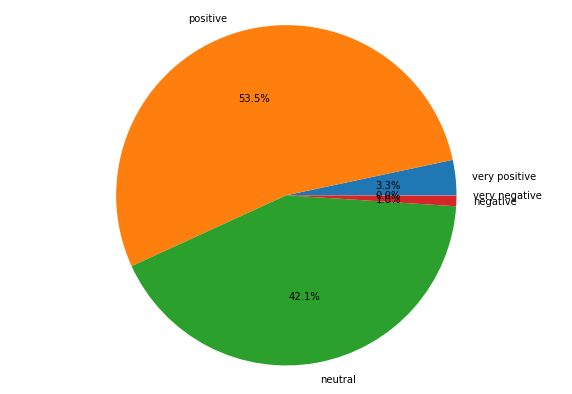

In [48]:
# Most reviews are 

plt.figure(figsize =(10, 7)) 
plt.pie([757, 12112, 9539, 225, 8], labels = ['very positive', 'positive', 'neutral', 'negative', 'very negative'], autopct='%1.1f%%');
plt.axis('equal')
plt.show()

In [46]:
analysis_df[analysis_df['polarity_bins'] == 'very negative']

,clothing_id,lemmatized,recommended,rating,age,class,department,division_name,length,polarity,polarity_bins
4933,863,"['disappointment', 'price', 'outrageous']",0,1,52,Knits,Tops,General,57,-0.80,very negative
6073,1110,"['awful', 'horribly', 'wrinkle', 'messso', 'di...",0,2,39,Dresses,Dresses,General,64,-1.00,very negative
9999,1039,"['terribly', 'unflattering', 'wash', 'look', '...",0,1,44,Jeans,Bottoms,General,159,-0.80,very negative
10513,860,"['dd', 'lbs', 'way', 'baggy', 'look', 'awful',...",0,2,26,Knits,Tops,General,143,-0.60,very negative
12442,1078,"['horrible', 'understand', 'aline', 'skin', 'n...",0,1,42,Dresses,Dresses,General Petite,108,-1.00,very negative
15256,936,"['bought', 'way', 'pocket', 'sew', 'attach', '...",1,5,40,Sweaters,Tops,General Petite,252,-0.70,very negative
17009,862,"['go', 'cold', 'winter', 'day', 'cant', 'dress']",1,5,51,Knits,Tops,General,87,-0.60,very negative
19765,870,"['receive', 'product', 'gap', 'hole', 'disappo...",0,1,61,Knits,Tops,General,121,-0.75,very negative


In [47]:
analysis_df[analysis_df['polarity_bins'] == 'very positive']

,clothing_id,lemmatized,recommended,rating,age,class,department,division_name,length,polarity,polarity_bins
0,767,"['absolutely', 'wonderful', 'silky', 'sexy', '...",1,4,33,Intimates,Intimate,Initmates,53,0.633333,very positive
30,1060,"['beautifully', 'make', 'pant', 'trend', 'flar...",1,5,33,Pants,Bottoms,General Petite,94,0.616667,very positive
64,862,"['love', 'really', 'happy', 'find', 'sale']",1,5,43,Knits,Tops,General,55,0.650000,very positive
106,1081,"['perfect', 'hot', 'humid', 'sticky', 'weather']",1,5,47,Dresses,Dresses,General,45,0.625000,very positive
145,1008,"['like', 'reviewer', 'note', 'pic', 'dont', 'j...",1,5,36,Skirts,Bottoms,General,168,0.612500,very positive
...,...,...,...,...,...,...,...,...,...,...,...
22430,1094,"['perfect', 'perfect', 'tie', 'optional', 'wed...",1,5,25,Dresses,Dresses,General,285,0.785714,very positive
22471,1059,"['great', 'get', 'color', 'go', 'tall', 'every...",1,5,34,Pants,Bottoms,General,109,0.800000,very positive
22497,1082,"['nice', 'light', 'weight', 'drape', 'well', '...",1,5,37,Dresses,Dresses,General,109,0.666667,very positive
22501,1110,"['great', 'easy', 'comfy']",1,5,25,Dresses,Dresses,General Petite,64,0.616667,very positive


In [ ]:
# Since there were not many reviews classified as 'very positive' or 'very negative' we try creating three bins instead
# Positive, negative and neutral

positive = (analysis_df["polarity"] > 0)
neutral = (analysis_df["polarity"] == 0)
negative = (analysis_df["polarity"] < 0)

analysis_df["review_type"] = " "
analysis_df["review_type"][positive] = "positive"
analysis_df["review_type"][neutral] = "neutral"
analysis_df["review_type"][negative] = "negative"

analysis_df.head()

In [55]:
analysis_df['review_type'].value_counts()

positive    20633
negative     1815
neutral       193
Name: review_type, dtype: int64

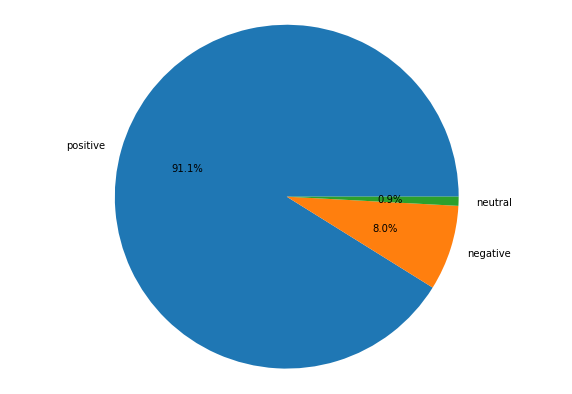

In [56]:
# Most reviews are 

plt.figure(figsize =(10, 7)) 
plt.pie([20633, 1815, 193], labels = ['positive', 'negative', 'neutral'], autopct='%1.1f%%');
plt.axis('equal')
plt.show()

In [58]:
pos_df = analysis_df[analysis_df['review_type'] == 'positive']
neg_df = analysis_df[analysis_df['review_type'] == 'negative']

In [59]:
pos_words = " ".join(review for review in pos_df['lemmatized'])
neg_words = " ".join(review for review in neg_df['lemmatized'])

In [68]:
pos_df

,clothing_id,lemmatized,recommended,rating,age,class,department,division_name,length,polarity,polarity_bins,review_type
0,767,"['absolutely', 'wonderful', 'silky', 'sexy', '...",1,4,33,Intimates,Intimate,Initmates,53,0.633333,very positive,positive
1,1080,"['love', 'sooo', 'pretty', 'happen', 'find', '...",1,5,34,Dresses,Dresses,General,303,0.318750,positive,positive
2,1077,"['high', 'hope', 'really', 'want', 'work', 'in...",0,3,60,Dresses,Dresses,General,500,0.045530,neutral,positive
3,1049,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",1,5,50,Pants,Bottoms,General Petite,124,0.500000,positive,positive
4,847,"['flatter', 'due', 'adjustable', 'front', 'tie...",1,5,47,Blouses,Tops,General,192,0.458333,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
22636,1104,"['happy', 'snag', 'great', 'price', 'easy', 's...",1,5,34,Dresses,Dresses,General Petite,131,0.677778,very positive,positive
22637,862,"['reminds', 'maternity', 'clothes', 'soft', 's...",1,3,48,Knits,Tops,General Petite,223,0.191667,neutral,positive
22638,1104,"['well', 'see', 'never', 'work', 'glad', 'able...",0,3,31,Dresses,Dresses,General Petite,208,0.450000,positive,positive
22639,1084,"['buy', 'wed', 'summer', 'cute', 'unfortunatel...",1,3,28,Dresses,Dresses,General,427,0.338889,positive,positive


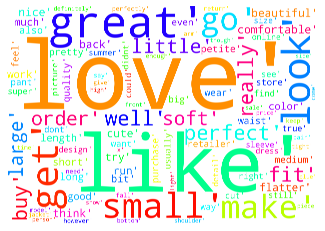

In [64]:
# Generate wordCloud of positive reviews

wordcloud = WordCloud(width = 10000, height = 7000, random_state = 1, 
                      background_color = 'white', colormap = 'hsv', collocations = False, 
                      min_font_size = 40, max_words = 100).generate(pos_words)

# Display the image 

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

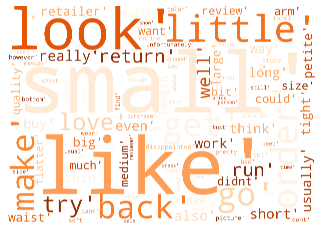

In [65]:
# Generate wordCloud of negative reviews

wordcloud = WordCloud(width = 10000, height = 7000, random_state = 1, 
                      background_color = 'white', colormap = 'Oranges', collocations = False, 
                      min_font_size = 40, max_words = 100).generate(neg_words)

# Display the image 

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [72]:
# Identify the top 10 article ID's with most negative reviews

neg_df['clothing_id'].value_counts().head(10)

1078    64
1094    63
862     53
1081    40
872     40
829     39
868     38
1095    38
895     32
1059    32
Name: clothing_id, dtype: int64

In [73]:
# Identify the top 10 article ID's with most positive reviews

pos_df['clothing_id'].value_counts().head(10)

1078    919
862     718
1094    664
1081    515
872     471
829     471
1110    440
868     371
895     348
936     321
Name: clothing_id, dtype: int64

In [69]:
pos_df.to_csv('positive-reviews.csv')

In [70]:
neg_df.to_csv('negative-reviews.csv')